In [1]:
import pandas as pd

dados = pd.read_csv('transito.csv')

In [2]:
dados.head(10)

,entity_id,impacto,restricao_circulacao,morada,periodos_condicionamentos,motivo,position,creation_date
0,EMEL.condicionamentoTransito.COND-2021-767-1,Relevante,Estreitamento de via,Alto da Boavista/Rotunda Pina Manique/Estrada ...,"[{'end_date': '1616011200000', 'date_min': '20...",OBRA - FAIXA DE RODAGEM,"{'type': 'GeometryCollection', 'geometries': [...",2021-02-04 10:00:09
1,EMEL.condicionamentoTransito.COND-2021-1499-3,Pouco relevante,Estacionamento,"Avenida dos Estados Unidos da América, nº97 e 95","[{'end_date': '1616018400000', 'date_min': '20...",FILMAGENS,"{'type': 'GeometryCollection', 'geometries': [...",2021-03-09 14:44:49
2,EMEL.condicionamentoTransito.COND-2021-1572-A-1,Relevante,Estreitamento de via,Avenida Professor Egas Moniz ft. ao CHULN/HOSP...,"[{'end_date': '1616018400000', 'date_min': '20...",CONCENTRAÇÃO,"{'type': 'GeometryCollection', 'geometries': [...",2021-03-11 12:46:02
3,EMEL.condicionamentoTransito.COND-2021-1499-4,Pouco relevante,Estacionamento,Rua Pereira Henriques entre os nºs 26 - 14,"[{'end_date': '1616018400000', 'date_min': '20...",FILMAGENS,"{'type': 'GeometryCollection', 'geometries': [...",2021-03-09 14:47:00
4,EMEL.condicionamentoTransito.COND-2020-6258-51,Relevante,Corte total,2.ª Circular - entre o IP7 {Eixo N/S} e o ramo...,"[{'end_date': '1616047200000', 'date_min': '20...",REPAVIMENTAÇÕES,"{'type': 'GeometryCollection', 'geometries': [...",2021-03-16 14:33:56
5,EMEL.condicionamentoTransito.COND-2020-2950-PA-24,Relevante,Estreitamento de via,"Praça dos Restauradores,79-80/Rua Jardim do Re...","[{'end_date': '1616054400000', 'date_min': '20...",CARGAS E DESCARGAS/OBRAS,"{'type': 'GeometryCollection', 'geometries': [...",2021-02-22 17:05:34
6,EMEL.condicionamentoTransito.COND-2021-1117-12,Relevante,Mantém perfil de via,Rua do Zaire,"[{'end_date': '1616781600000', 'date_min': '20...",PINTURAS,"{'type': 'GeometryCollection', 'geometries': [...",2021-02-22 14:07:03
7,EMEL.condicionamentoTransito.COND-2021-1117-4,Pouco relevante,Mantém perfil de via,Rua Maria Andrade,"[{'end_date': '1616781600000', 'date_min': '20...",PINTURAS,"{'type': 'GeometryCollection', 'geometries': [...",2021-02-22 13:49:38
8,EMEL.condicionamentoTransito.COND-2021-1662-A-1,Relevante,Passeio,Banco Santander Totta - Banco Santander Totta,"[{'end_date': '1616072400000', 'date_min': '20...",CONCENTRAÇÃO,"{'type': 'GeometryCollection', 'geometries': [...",2021-03-16 10:38:31
9,EMEL.condicionamentoTransito.COND-2021-1622-1,Relevante,Estreitamento de via,"Praça da Constituição de 1976, Frente à Assemb...","[{'end_date': '1616090400000', 'date_min': '20...",CONCENTRAÇÃO,"{'type': 'GeometryCollection', 'geometries': [...",2021-03-15 09:36:38


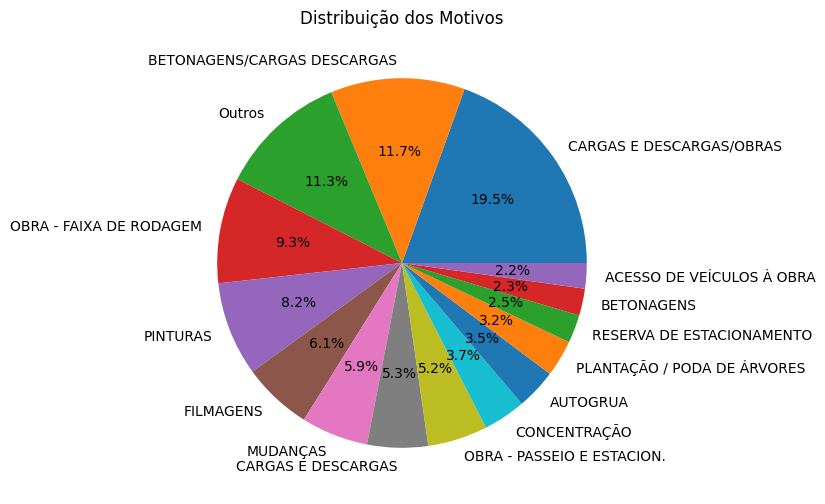

In [3]:
import matplotlib.pyplot as plt
contagem_motivos = dados['motivo'].value_counts()

porcentagem_motivos = 100 * contagem_motivos / contagem_motivos.sum()

outros = porcentagem_motivos < 2

dados['motivo'] = dados['motivo'].where(~dados['motivo'].isin(porcentagem_motivos.index[outros]), 'Outros')

# Contar a frequência dos motivos novamente
contagem_motivos = dados['motivo'].value_counts()

# Criar o gráfico circular
plt.figure(figsize=(10, 6))
plt.pie(contagem_motivos, labels = contagem_motivos.index, autopct='%1.1f%%')
plt.title('Distribuição dos Motivos')
plt.show()


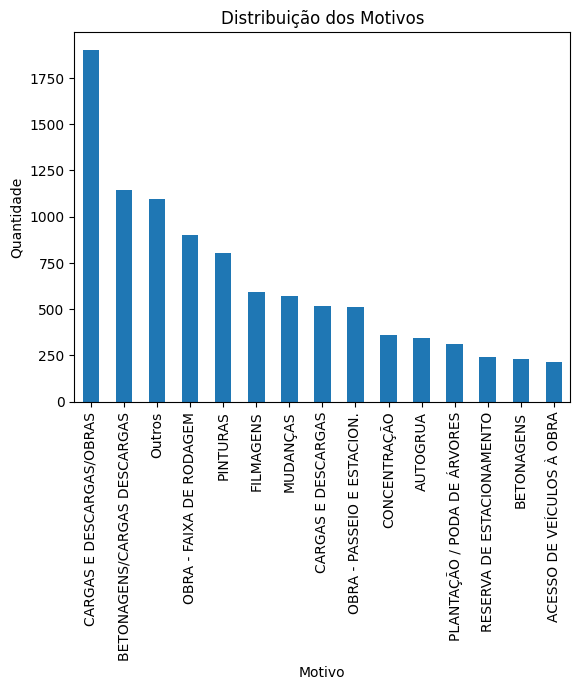

In [4]:
dados['motivo'].value_counts().plot(kind='bar')
plt.title('Distribuição dos Motivos')
plt.xlabel('Motivo')
plt.ylabel('Quantidade')
plt.show()


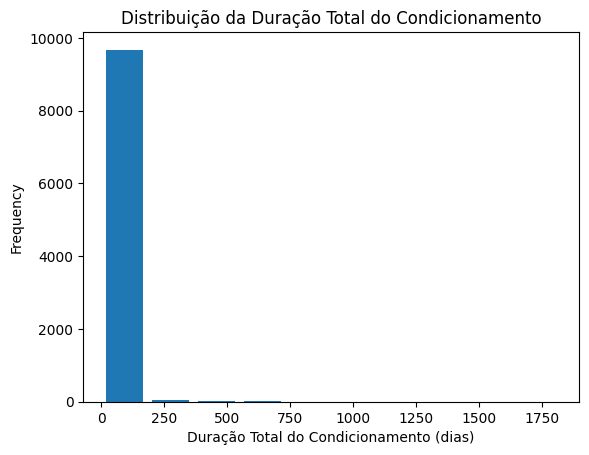

In [5]:
import ast

# Calcular a duração total do condicionamento em dias
dados['duracao_total_condicionamento'] = dados['periodos_condicionamentos'].apply(lambda x: sum((int(i['end_date']) - int(i['start_date'])) for i in ast.literal_eval(x)) / (1000 * 60 * 60 * 24))

# Plotar um histograma da duração total do condicionamento
dados['duracao_total_condicionamento'].plot(kind='hist', rwidth=0.8)
plt.title('Distribuição da Duração Total do Condicionamento')
plt.xlabel('Duração Total do Condicionamento (dias)')
plt.show()


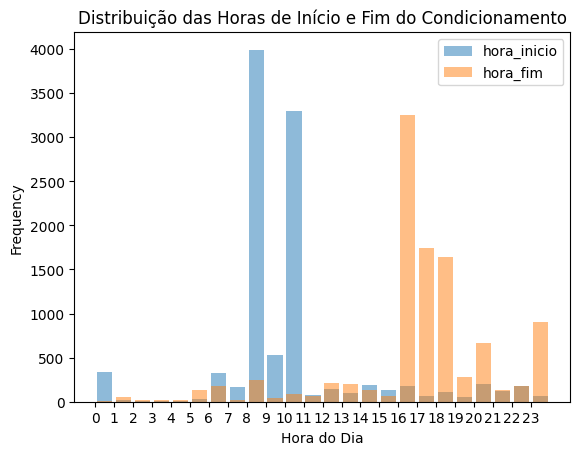

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Extrair as horas de início e fim do condicionamento
dados['hora_inicio_condicionamento'] = dados['periodos_condicionamentos'].apply(lambda x: [i['hour_min'] for i in ast.literal_eval(x)])
dados['hora_fim_condicionamento'] = dados['periodos_condicionamentos'].apply(lambda x: [i['hour_max'] for i in ast.literal_eval(x)])

# Converter as horas para um formato numérico (por exemplo, "08:00:00" se torna 8.0)
dados['hora_inicio_condicionamento'] = dados['hora_inicio_condicionamento'].apply(lambda x: [float(i.split(':')[0]) + float(i.split(':')[1])/60 for i in x])
dados['hora_fim_condicionamento'] = dados['hora_fim_condicionamento'].apply(lambda x: [float(i.split(':')[0]) + float(i.split(':')[1])/60 for i in x])

horas_condicionamento = pd.DataFrame({'hora_inicio': [hora for sublist in dados['hora_inicio_condicionamento'] for hora in sublist],
                                      'hora_fim': [hora for sublist in dados['hora_fim_condicionamento'] for hora in sublist]})

# Plotar um histograma das horas de início e fim do condicionamento
horas_condicionamento[['hora_inicio', 'hora_fim']].plot(kind='hist', rwidth=0.8, alpha=0.5, bins=24)
plt.title('Distribuição das Horas de Início e Fim do Condicionamento')
plt.xlabel('Hora do Dia')
plt.xticks(range(24))
plt.show()


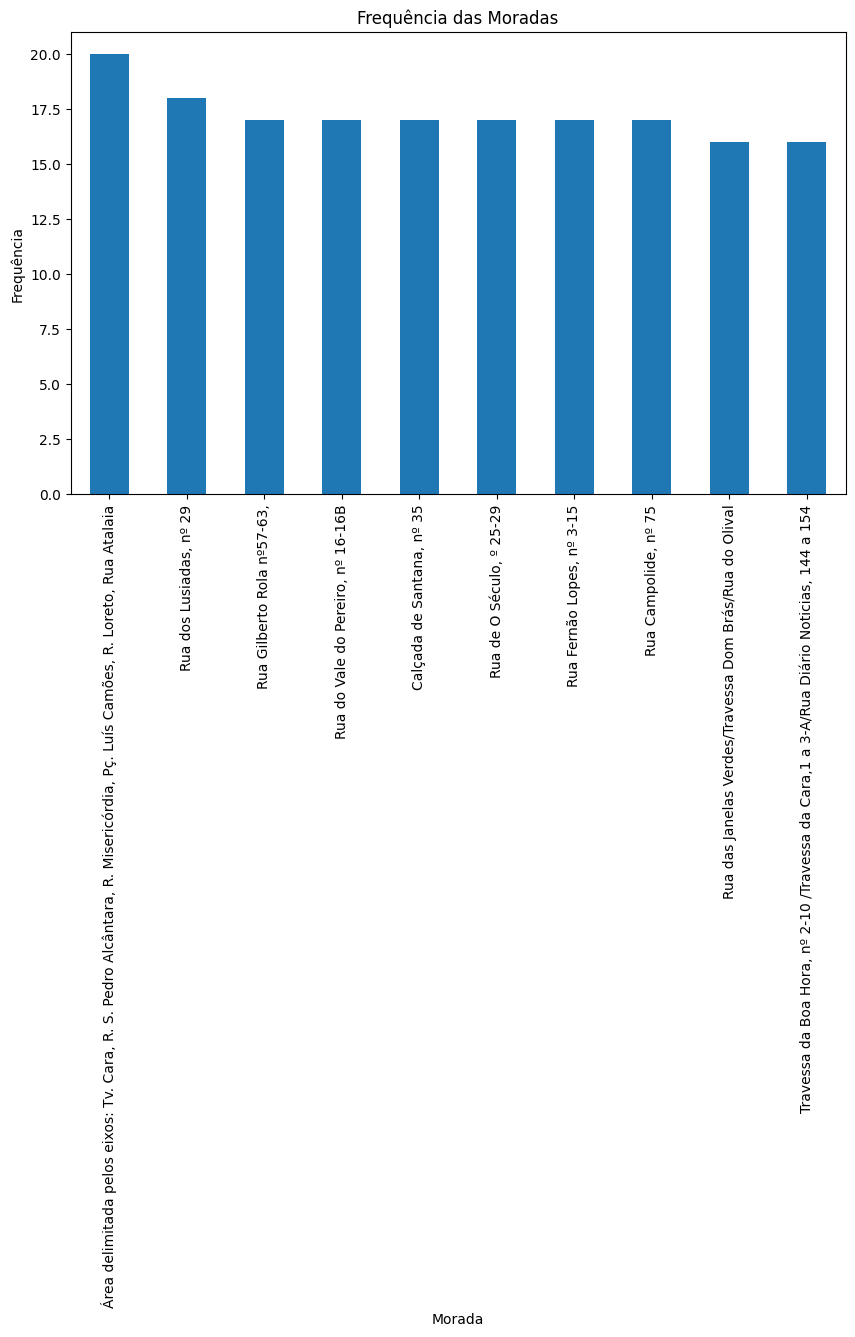

In [7]:
#Contar a frequência de cada morada
contagem_moradas = dados['morada'].value_counts()

#Selecionar as 10 moradas mais frequentes
top_moradas = contagem_moradas.nlargest(10)

#Criar o gráfico de barras
plt.figure(figsize=(10, 6))
top_moradas.plot(kind='bar')
plt.title('Frequência das Moradas')
plt.xlabel('Morada')
plt.ylabel('Frequência')
plt.show()

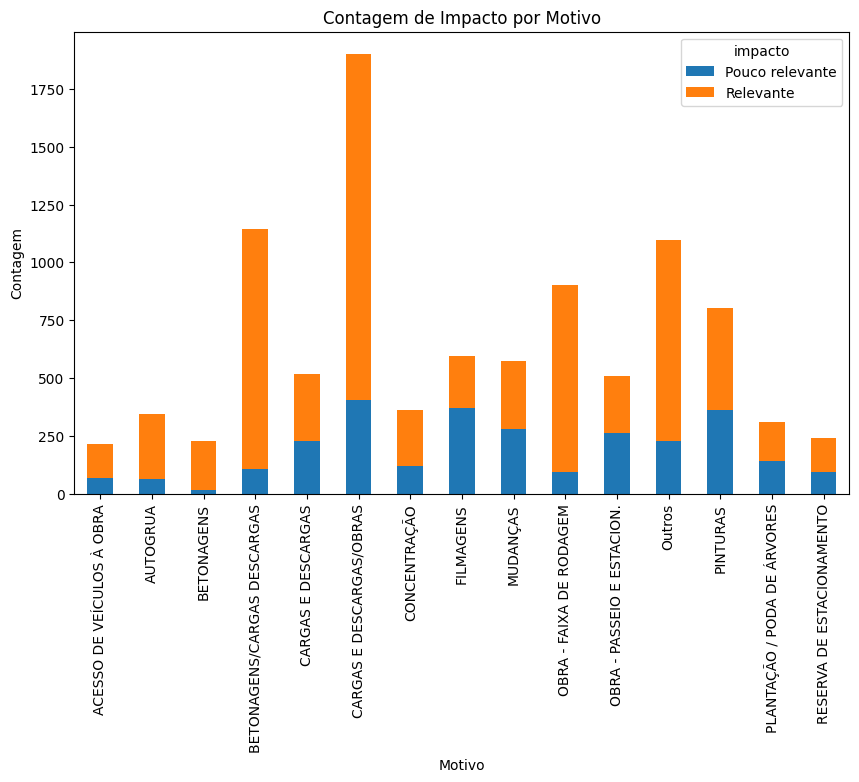

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar o número de ocorrências de cada nível de 'impacto' para cada 'motivo'
contagem_impacto_por_motivo = dados.groupby('motivo')['impacto'].value_counts().unstack()

# Criar um gráfico de barras empilhadas
contagem_impacto_por_motivo.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Contagem de Impacto por Motivo')
plt.xlabel('Motivo')
plt.ylabel('Contagem')
plt.show()
